In [32]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

## Load Task Image

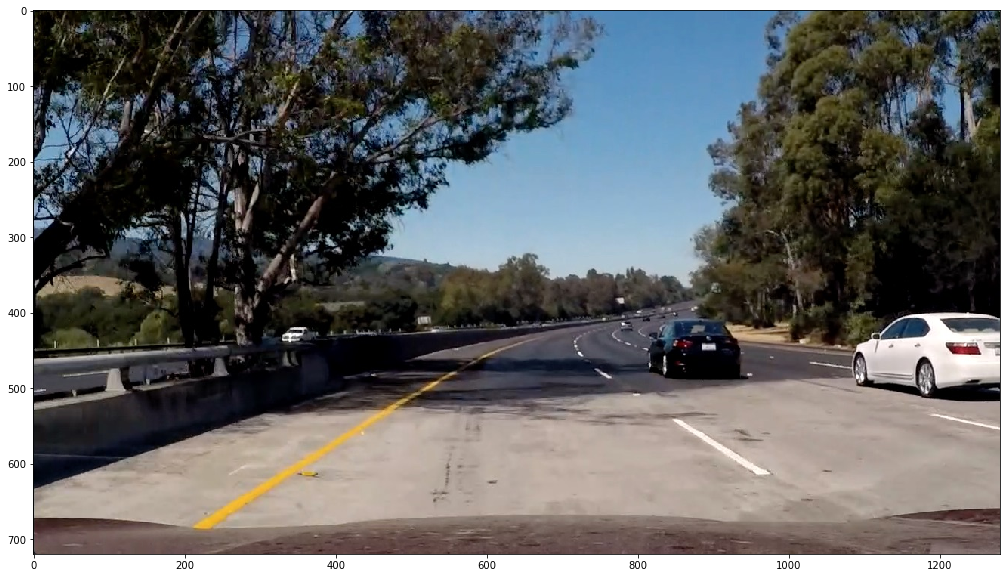

In [33]:
task_image = mpimg.imread('./test5.jpg')
f, (ax1) = plt.subplots(1, 1, figsize=(20,10))
ax1.imshow(task_image)

## Sobel X / Y Threshold

In [38]:
# X or Y sobel gradient
def abs_sobel_thresh(image, orient='x', sobel_kernel=3, thresh=(0, 255)):
    # TODO: Convert to grayscale using cv2.COLOR_RGB2GRAY as the conversion
    img = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    # TODO: Apply x or y gradient with the OpenCV Sobel() function
    # and take the absolute value
    if orient=='x':
        gradient = cv2.Sobel(img, cv2.CV_32F, 1, 0)
    elif orient=='y':
        gradient = cv2.Sobel(img, cv2.CV_32F, 0, 1)
    
    gradient = np.absolute(gradient)
   
    # TODO: Rescale back to 8 bit integer
    abs_sobel = np.uint8(255*gradient/np.max(gradient))
    
    # TODO: Create a binary image of ones where threshold is met, zeros otherwise
    
    ret,abs_sobel_output = cv2.threshold(abs_sobel,thresh[0],thresh[1],cv2.THRESH_BINARY)
    

    # Return the binary image
    return abs_sobel_output

## Sobel Magnitude Threshold

In [46]:
# Magnitude using X and Y sobel gradient
def mag_thresh(image, sobel_kernel=3, mag_thresh=(0, 255)):
    # TODO: Convert to grayscale using cv2.COLOR_RGB2GRAY as the conversion
    img = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    # TODO: Calculate the gradient magnitude
    # X gradient
    g_x = abs_sobel_thresh(image, orient='x', sobel_kernel=3, thresh=(30,100))
    # Y gradient
    g_y = abs_sobel_thresh(image, orient='y', sobel_kernel=3, thresh=(30,100))

    
    gradmag = np.sqrt( np.square(g_x) + np.square(g_y) )
    
    # TODO:  Rescale to 8 bit
    gradmag = np.uint8(255*gradmag/np.max(gradmag))
   
    # TODO: Create a binary image of ones where threshold is met, zeros otherwise
    #mag_binary = np.zeros_like(gradmag)
    ret,mag_binary = cv2.threshold(gradmag,mag_thresh[0],mag_thresh[1],cv2.THRESH_BINARY)
   

    # Return the binary image
    return mag_binary

## Sobel Direction Threshold

In [47]:
# Direction using X and Y sobel gradient
def dir_threshold(image, sobel_kernel=3, thresh=(0, np.pi/2)):
    # TODO: Convert to grayscale using cv2.COLOR_RGB2GRAY as the conversion
    img = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    # TODO: Calculate the gradient direction using np.arctan2 function
    # X gradient
    g_x = abs_sobel_thresh(image, orient='x', sobel_kernel=3, thresh=(30,100))
    # Y gradient
    g_y = abs_sobel_thresh(image, orient='y', sobel_kernel=3, thresh=(30,100))
    
    absgraddir = np.arctan2(g_y, g_x)
    
    # TODO: Rescale to 8 bit
    absgraddir = np.uint8(255*absgraddir/np.max(absgraddir))
   
    # TODO: Create a binary image of ones where threshold is met, zeros otherwise    
    ret,dir_binary = cv2.threshold(absgraddir,thresh[0],thresh[1],cv2.THRESH_BINARY)

    # Return the binary image
    return dir_binary

## Visualize Sobel Thresholds Results

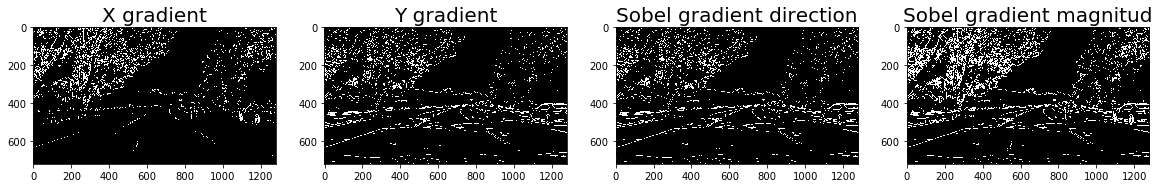

In [56]:
#TODO: Visualize the following:

# X gradient
x_sobel = abs_sobel_thresh(task_image, orient='x', sobel_kernel=3, thresh=(30,100))
# Y gradient
y_sobel = abs_sobel_thresh(task_image, orient='y', sobel_kernel=3, thresh=(30,100))

# Sobel gradient direction
dir_sobel = dir_threshold(task_image, sobel_kernel=3, thresh=(0, np.pi/2))

# Sobel gradient magnitude
mag_sobel = mag_thresh(task_image, sobel_kernel=3, mag_thresh=(30,100))

# visualize results
f, (ax1,ax2,ax3,ax4) = plt.subplots(1, 4, figsize=(20,10))
# X gradient
ax1.set_title('X gradient', fontsize=20)
ax1.imshow(x_sobel,cmap='gray')
# Y gradient
ax2.set_title('Y gradient', fontsize=20)
ax2.imshow(y_sobel,cmap='gray')
# Sobel gradient direction
ax3.set_title('Sobel gradient direction', fontsize=20)
ax3.imshow(dir_sobel,cmap='gray')
# Sobel gradient magnitude
ax4.set_title('Sobel gradient magnitud', fontsize=20)
ax4.imshow(mag_sobel,cmap='gray')